In [28]:
#Impoting requried library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [29]:
#reading the data from the csv
yields = pd.read_csv('yields.csv',parse_dates=['Date'],index_col='Date')

In [30]:
#cleaning the data 
yields.isna().sum()

3_month    0
6_month    0
1_year     0
2_year     0
3_year     0
5_year     0
7_year     0
10_year    0
13_year    0
15_year    0
24_year    0
30_year    0
dtype: int64

In [31]:
yields.describe()

,3_month,6_month,1_year,2_year,3_year,5_year,7_year,10_year,13_year,15_year,24_year,30_year
count,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000,2765.000000
mean,6.332654,6.483666,6.368336,6.554468,6.719575,6.948860,7.169468,7.105606,7.350740,7.416080,7.480225,7.467389
std,4.895460,4.804304,1.342742,1.178045,1.060548,0.897359,0.762728,0.719968,0.653542,0.647177,0.592515,0.587469
min,2.700000,3.250000,3.313000,3.861000,4.277000,4.840000,5.613000,5.760000,6.218000,6.244000,6.388000,6.393000
25%,5.290000,5.560000,5.825000,5.950000,6.225000,6.404000,6.700000,6.545000,6.882000,6.919000,7.040000,7.048000
50%,6.430000,6.580000,6.650000,6.764000,6.900000,7.037000,7.088000,7.114000,7.261000,7.330000,7.354000,7.366000
75%,6.920000,7.110000,7.162000,7.279000,7.352000,7.477000,7.699000,7.580000,7.774000,7.894000,7.874000,7.839000
max,98.667000,97.254000,9.151000,8.855000,8.919000,9.092000,9.302000,9.101000,9.427000,9.356000,9.410000,9.418000


In [32]:
#Droping the rows where any maturity is higher than 11
yields = yields[~(yields>11).any(axis=1)]

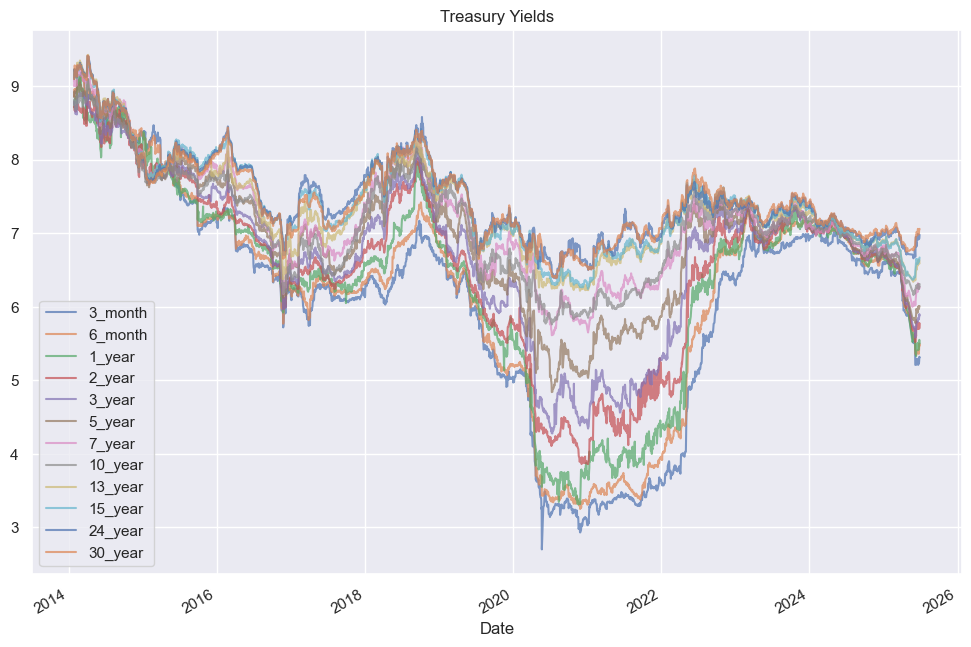

In [33]:
#plot the Treasury Yields
yields.plot(figsize=(12,8),title='Treasury Yields',alpha=0.7)
#plt.savefig('Treasury Yields')
plt.show()

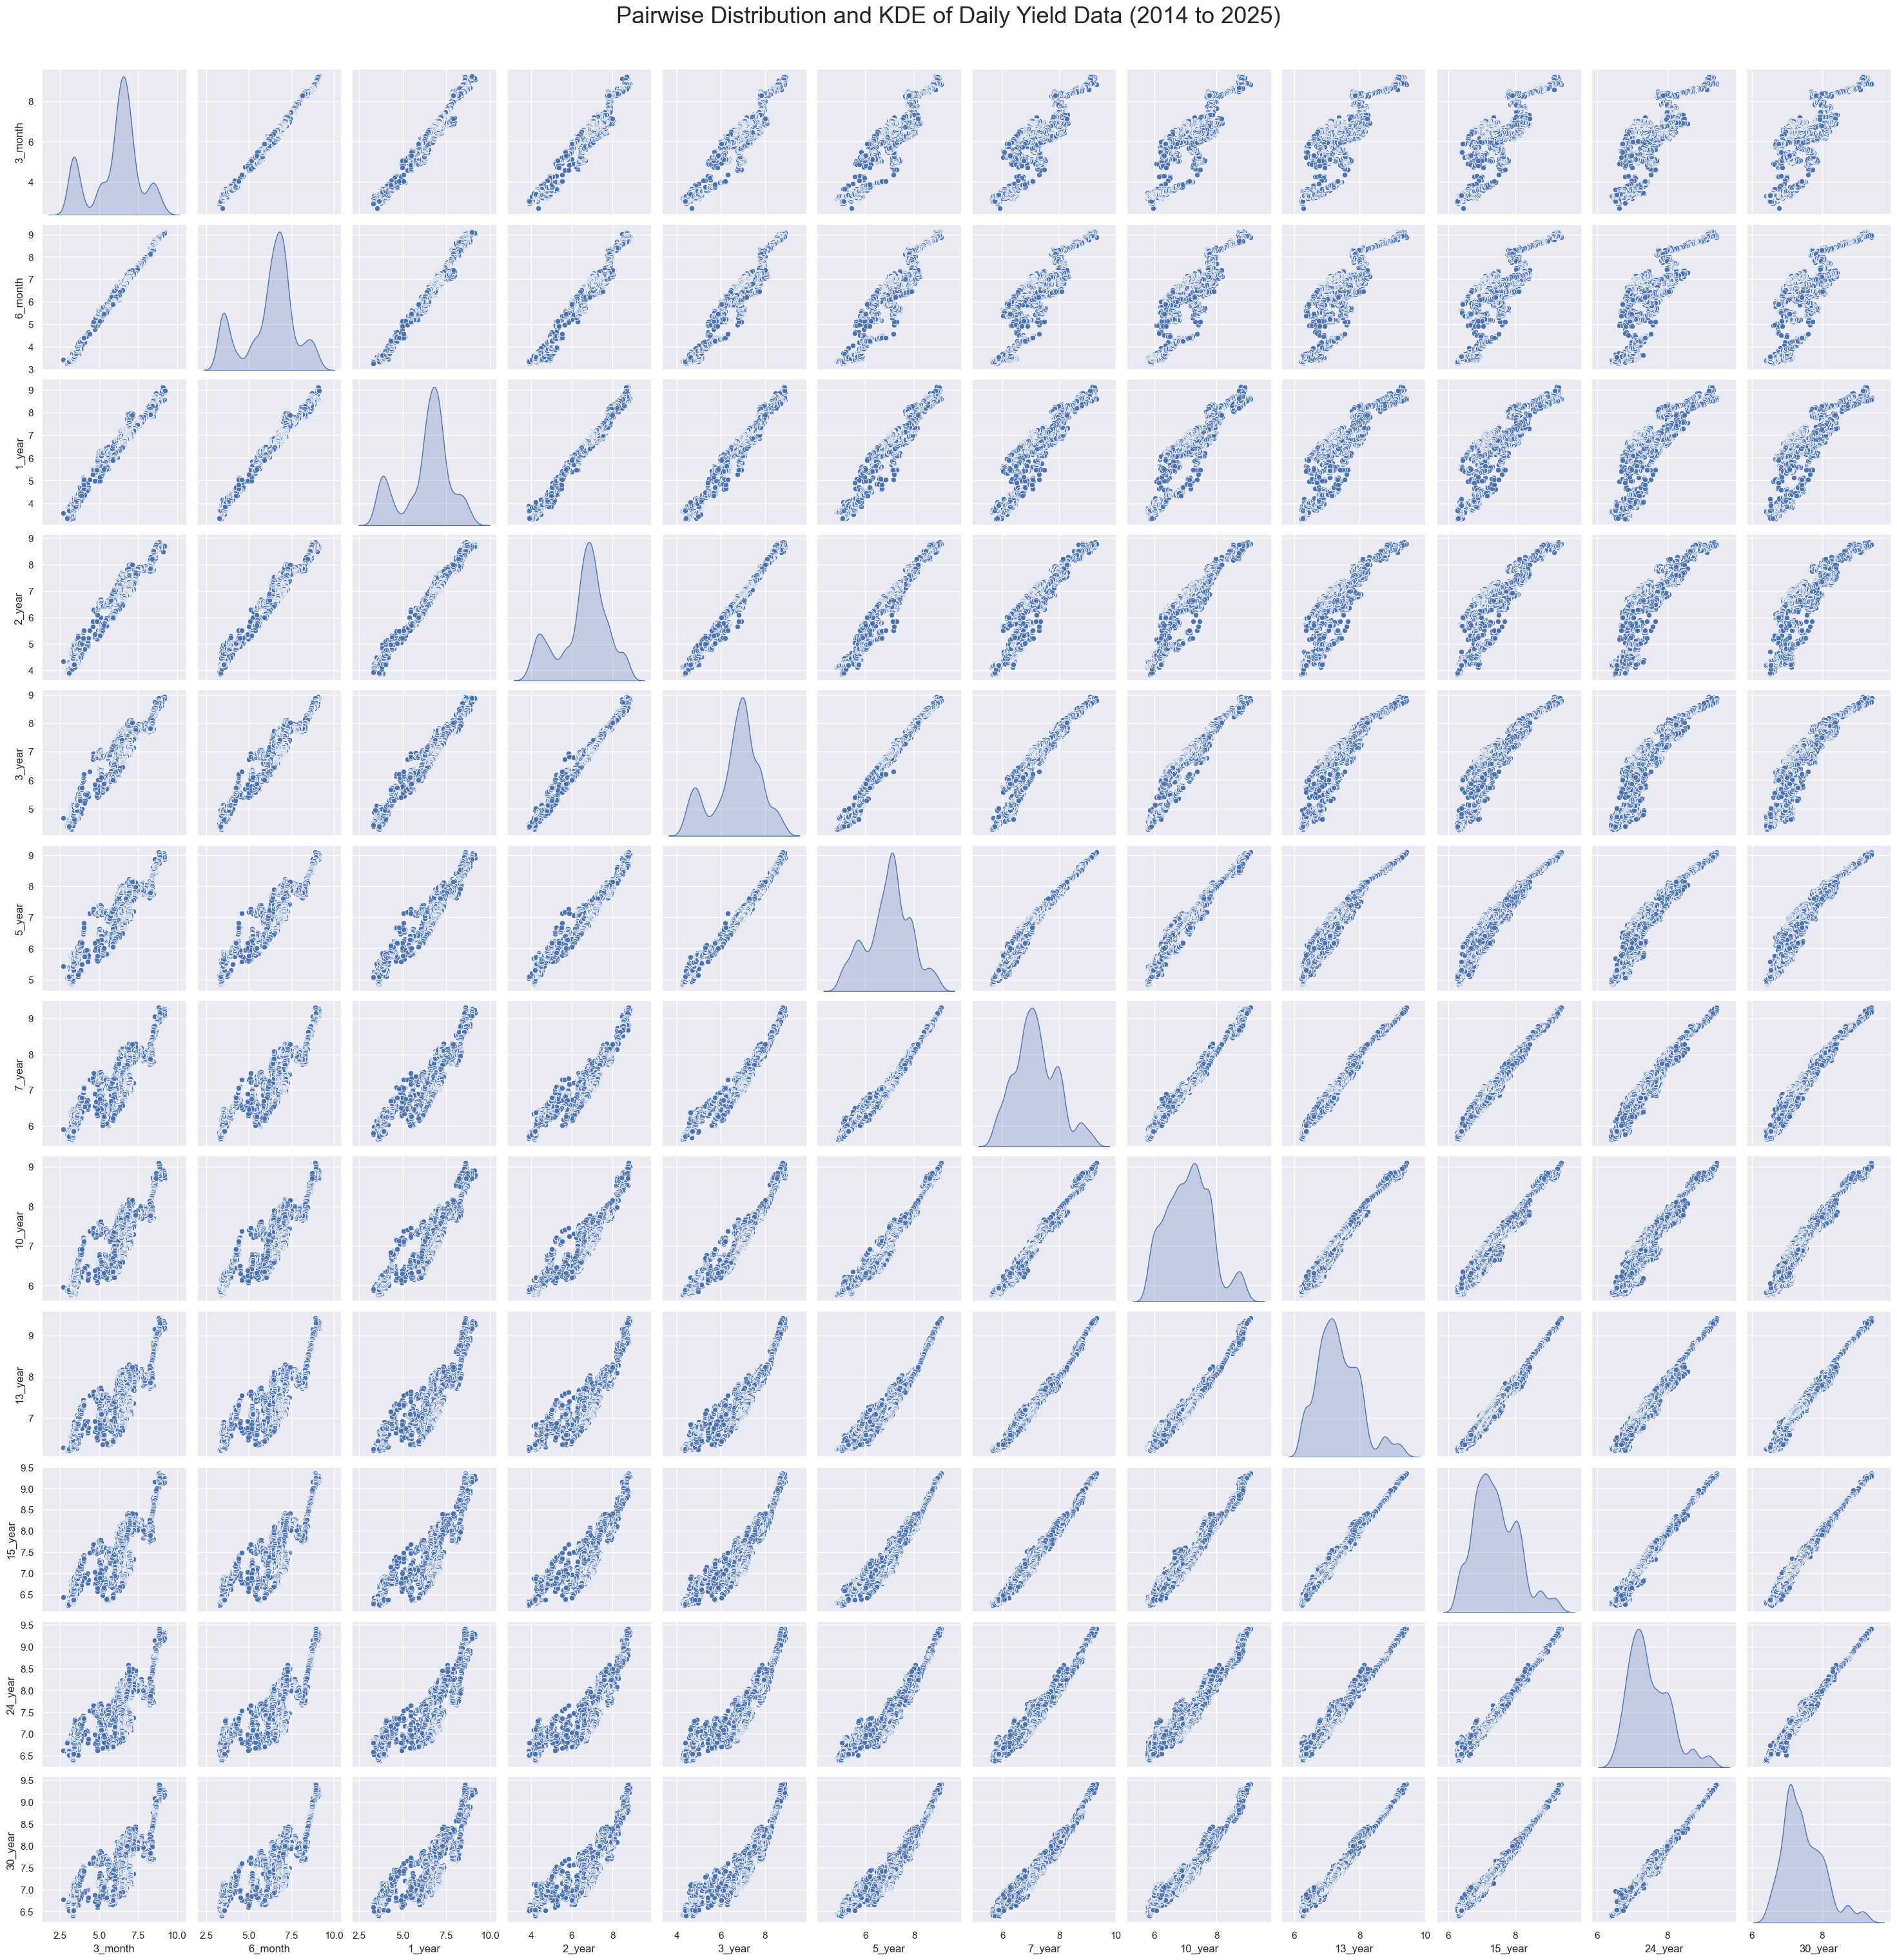

In [42]:
#pairplot with KDE on the diagonal
sns.pairplot(yields,diag_kind='kde')
plt.suptitle("Pairwise Distribution and KDE of Daily Yield Data (2014 to 2025)",
             y=1.02, fontsize=26)
plt.savefig('images/Pairwise Distribution and KDE of Daily Yield Data (2014 to 2025)')
plt.show()

In [35]:
yields.columns

Index(['3_month', '6_month', '1_year', '2_year', '3_year', '5_year', '7_year',
       '10_year', '13_year', '15_year', '24_year', '30_year'],
      dtype='object')

C:\Users\amany\AppData\Local\Temp\ipykernel_7896\843647316.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:.2f}%'.format(y) for y in ax.get_yticks()])


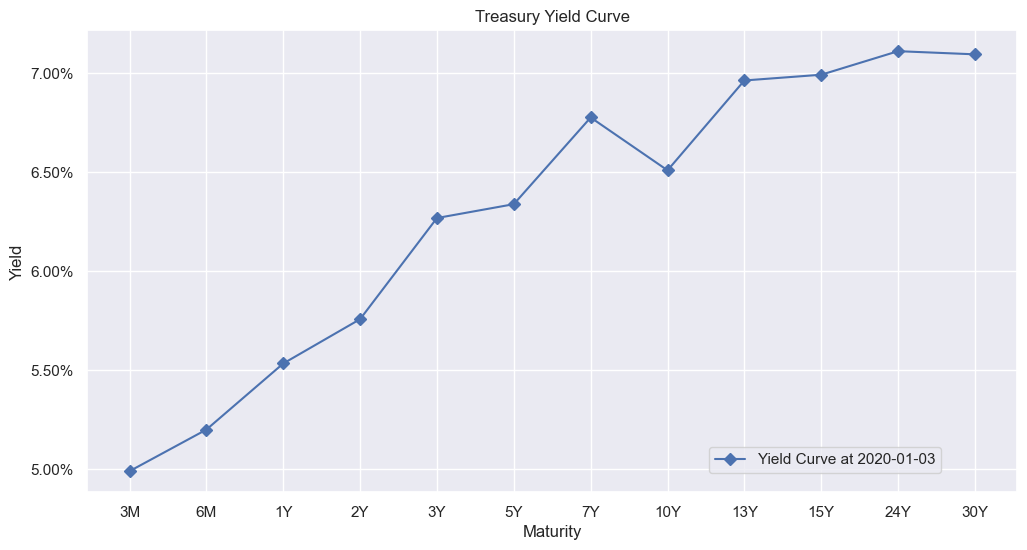

In [ ]:
def plot_yield_curve(date):
    maturities = ['3M', '6M', '1Y', '2Y', '3Y', '5Y', '7Y', '10Y', '13Y', '15Y', '24Y', '30Y'] # Maturities
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(maturities, yields.loc[date], marker='D', label='Yield Curve at ' + date)

    ax.set_yticklabels(['{:.2f}%'.format(y) for y in ax.get_yticks()])
    ax.set_xticks(range(len(maturities)))
    ax.set_xticklabels(maturities)

    # Add labels and title
    ax.set_xlabel('Maturity')
    ax.set_ylabel('Yield')
    ax.set_title('Treasury Yield Curve')

    fig.legend(loc = [0.69, 0.14])

    # Show the plot
    plt.grid(True)
    #plt.savefig("images/yield_curve_2020-01-03.png")
    plt.show()

plot_yield_curve('2020-01-03')

In [44]:
plt.savefig("images/yield_curve_2020-01-03.png")

<Figure size 640x480 with 0 Axes>

In [37]:
#
results = np.where(yields['2_year']>yields['10_year'])
results0 = np.where(yields['2_year']<yields['10_year'])

inverted_dates = yields.index[results]
normal_yields = yields.index[results0]

print(inverted_dates)
print(normal_yields)

DatetimeIndex(['2014-02-07', '2014-08-14', '2014-08-19', '2014-08-21',
               '2014-09-01', '2014-09-02', '2014-09-03', '2014-09-04',
               '2014-09-05', '2014-09-08',
               ...
               '2024-05-22', '2024-05-24', '2024-05-27', '2024-05-28',
               '2024-05-29', '2024-05-31', '2024-06-03', '2024-06-04',
               '2024-06-05', '2024-12-26'],
              dtype='datetime64[ns]', name='Date', length=196, freq=None)
DatetimeIndex(['2014-01-28', '2014-01-29', '2014-01-30', '2014-01-31',
               '2014-02-03', '2014-02-04', '2014-02-05', '2014-02-06',
               '2014-02-10', '2014-02-11',
               ...
               '2025-06-16', '2025-06-17', '2025-06-18', '2025-06-19',
               '2025-06-20', '2025-06-23', '2025-06-24', '2025-06-25',
               '2025-06-26', '2025-06-27'],
              dtype='datetime64[ns]', name='Date', length=2560, freq=None)


C:\Users\amany\AppData\Local\Temp\ipykernel_7896\2054391021.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['{:.2f}%'.format(y) for y in ax.get_yticks()])


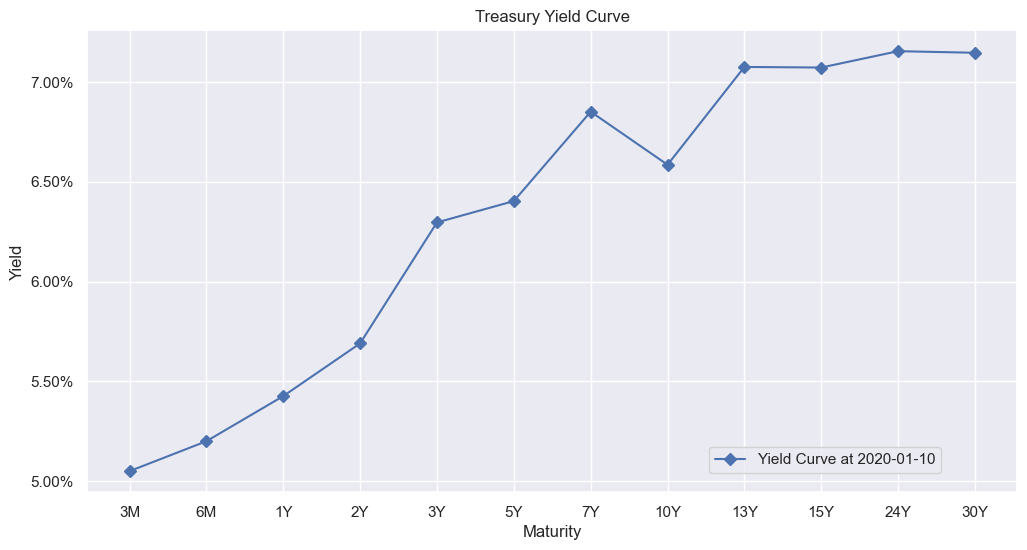

In [38]:
plot_yield_curve("2020-01-10")

In [39]:
#fitting nelson_siegel
from nelson_siegel_svensson.calibrate import calibrate_ns_ols
# Create maturity and yield variables in array form
t = np.array([0.25,0.5,1,2,3,5,7,10,13,15,24,30])
y = np.array(yields.loc["2020-01-10"])

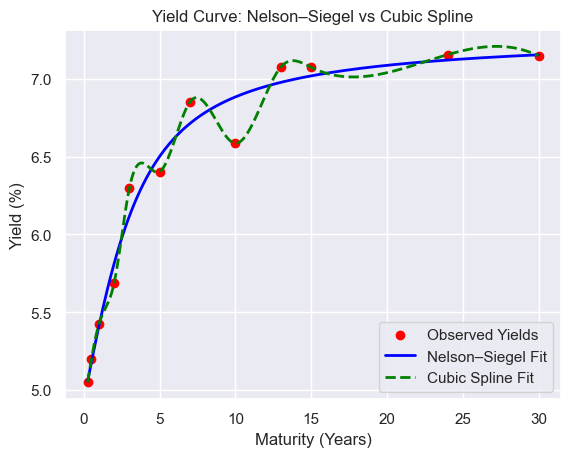

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from nelson_siegel_svensson.calibrate import calibrate_ns_ols
from scipy.interpolate import CubicSpline

# Maturities (in years) and yields (from your dataset)
t = np.array([0.25, 0.5, 1, 2, 3, 5, 7, 10, 13, 15, 24, 30])
y = np.array(yields.loc["2020-01-10"]) 

# --- Nelson–Siegel Fit ---
curve_ns, status = calibrate_ns_ols(t, y, tau0=1.0)

# --- Cubic Spline Fit ---
curve_cs = CubicSpline(t, y)

# Smooth maturities for plotting
t_hat = np.linspace(0.25, 30, 300)

# Plot actual data
plt.scatter(t, y, color='red', label='Observed Yields')

# Plot Nelson–Siegel curve
if status.success:
    plt.plot(t_hat, curve_ns(t_hat), label='Nelson–Siegel Fit', color='blue', linewidth=2)

# Plot Cubic Spline curve
plt.plot(t_hat, curve_cs(t_hat), label='Cubic Spline Fit', color='green', linestyle='--', linewidth=2)

plt.xlabel("Maturity (Years)")
plt.ylabel("Yield (%)")
plt.title("Yield Curve: Nelson–Siegel vs Cubic Spline")
plt.legend()
plt.grid(True)
plt.savefig("images/yield_curve_comparison_2020-01-10.png")
plt.show()


In [41]:

### 📌 What you need to do:

plt.savefig("images/treasury_yields.png")
plt.savefig("images/pairwise_kde.png")
plt.savefig("images/yield_curve_2020-01-03.png")
plt.savefig("images/yield_curve_comparison_2020-01-10.png")


<Figure size 640x480 with 0 Axes>